In [2]:
import pandas as pd
import numpy as np


In [4]:
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns


In [8]:
import chardet

# Open the file in binary mode to detect encoding
with open("spam.csv", "rb") as file:
    result = chardet.detect(file.read())
    print(result)

{'encoding': 'Windows-1252', 'confidence': 0.7257971165545478, 'language': ''}


In [10]:
df = pd.read_csv("spam.csv",encoding="Windows-1252")

In [12]:
df


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [16]:
df = df.drop(columns = ["Unnamed: 2","Unnamed: 3","Unnamed: 4"])

In [18]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [20]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le = LabelEncoder()

In [24]:
df["v1"] = le.fit_transform(df["v1"])

In [26]:
df

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [28]:
df.rename(columns = {"v1":"target","v2":"text"},inplace = True)

In [30]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [32]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [34]:
df.duplicated().sum()

403

In [36]:
df.shape

(5572, 2)

In [38]:
df = df.drop_duplicates()

In [40]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [42]:
df.duplicated().sum()

0

In [44]:
df.shape

(5169, 2)

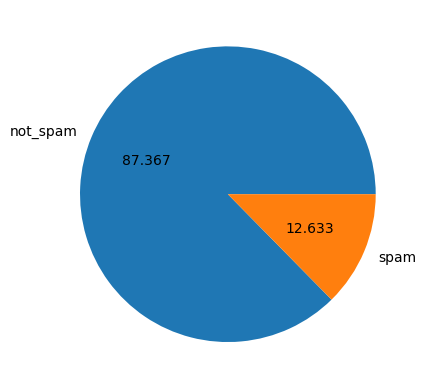

In [46]:
plt.pie(df["target"].value_counts(),labels=["not_spam","spam"],autopct = "%.3f")
plt.show()

In [48]:
df["target"].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [50]:
!pip install nltk


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [51]:
import nltk

In [54]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to C:\Users\DHRUV
[nltk_data]     PATEL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [56]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [58]:

df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [60]:
df["num_words"] = df["text"].apply(lambda x : len(nltk.word_tokenize(x)))


C:\Users\DHRUV PATEL\AppData\Local\Temp\ipykernel_9528\2374527817.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_words"] = df["text"].apply(lambda x : len(nltk.word_tokenize(x)))


In [62]:
df

,target,text,num_words
0,0,"Go until jurong point, crazy.. Available only ...",24
1,0,Ok lar... Joking wif u oni...,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37
3,0,U dun say so early hor... U c already then say...,13
4,0,"Nah I don't think he goes to usf, he lives aro...",15
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,35
5568,0,Will Ì_ b going to esplanade fr home?,9
5569,0,"Pity, * was in mood for that. So...any other s...",15
5570,0,The guy did some bitching but I acted like i'd...,27


In [64]:
 df["text"].apply(lambda x : len(nltk.sent_tokenize(x)))

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: text, Length: 5169, dtype: int64

In [66]:
df

,target,text,num_words
0,0,"Go until jurong point, crazy.. Available only ...",24
1,0,Ok lar... Joking wif u oni...,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37
3,0,U dun say so early hor... U c already then say...,13
4,0,"Nah I don't think he goes to usf, he lives aro...",15
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,35
5568,0,Will Ì_ b going to esplanade fr home?,9
5569,0,"Pity, * was in mood for that. So...any other s...",15
5570,0,The guy did some bitching but I acted like i'd...,27


In [68]:
df
df = pd.DataFrame(df)

In [70]:
df

,target,text,num_words
0,0,"Go until jurong point, crazy.. Available only ...",24
1,0,Ok lar... Joking wif u oni...,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37
3,0,U dun say so early hor... U c already then say...,13
4,0,"Nah I don't think he goes to usf, he lives aro...",15
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,35
5568,0,Will Ì_ b going to esplanade fr home?,9
5569,0,"Pity, * was in mood for that. So...any other s...",15
5570,0,The guy did some bitching but I acted like i'd...,27


In [72]:
df = df.drop(index="num_words")

KeyError: "['num_words'] not found in axis"

In [77]:
ser = pd.Series(df["text"])

In [79]:
ser

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5169, dtype: object

In [81]:
df["num_characters"] = ser.apply(len)

In [79]:
df

,target,text,num_words,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",24,111
1,0,Ok lar... Joking wif u oni...,8,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,155
3,0,U dun say so early hor... U c already then say...,13,49
4,0,"Nah I don't think he goes to usf, he lives aro...",15,61
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,35,161
5568,0,Will Ì_ b going to esplanade fr home?,9,37
5569,0,"Pity, * was in mood for that. So...any other s...",15,57
5570,0,The guy did some bitching but I acted like i'd...,27,125


In [81]:
df["num_words"] = ser.apply(lambda x : len(nltk.word_tokenize(x)))

In [85]:
df

,target,text,num_words,num_characters,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",24,111,2
1,0,Ok lar... Joking wif u oni...,8,29,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,155,2
3,0,U dun say so early hor... U c already then say...,13,49,1
4,0,"Nah I don't think he goes to usf, he lives aro...",15,61,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,35,161,4
5568,0,Will Ì_ b going to esplanade fr home?,9,37,1
5569,0,"Pity, * was in mood for that. So...any other s...",15,57,2
5570,0,The guy did some bitching but I acted like i'd...,27,125,1


In [83]:
df["num_sentences"] = ser.apply(lambda x : len(nltk.sent_tokenize(x)))

In [87]:
df

,target,text,num_words,num_characters,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",24,111,2
1,0,Ok lar... Joking wif u oni...,8,29,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,155,2
3,0,U dun say so early hor... U c already then say...,13,49,1
4,0,"Nah I don't think he goes to usf, he lives aro...",15,61,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,35,161,4
5568,0,Will Ì_ b going to esplanade fr home?,9,37,1
5569,0,"Pity, * was in mood for that. So...any other s...",15,57,2
5570,0,The guy did some bitching but I acted like i'd...,27,125,1


In [87]:
df[["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [89]:
temp = df[df["target"]==0]

In [91]:
temp

,target,text,num_words,num_characters,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",24,111,2
1,0,Ok lar... Joking wif u oni...,8,29,2
3,0,U dun say so early hor... U c already then say...,13,49,1
4,0,"Nah I don't think he goes to usf, he lives aro...",15,61,1
6,0,Even my brother is not like to speak with me. ...,18,77,2
...,...,...,...,...,...
5565,0,Huh y lei...,4,12,1
5568,0,Will Ì_ b going to esplanade fr home?,9,37,1
5569,0,"Pity, * was in mood for that. So...any other s...",15,57,2
5570,0,The guy did some bitching but I acted like i'd...,27,125,1


In [93]:
temp[["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [95]:
temp1 = df[["target","num_characters","num_words","num_sentences"]]

In [97]:
temp1.corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


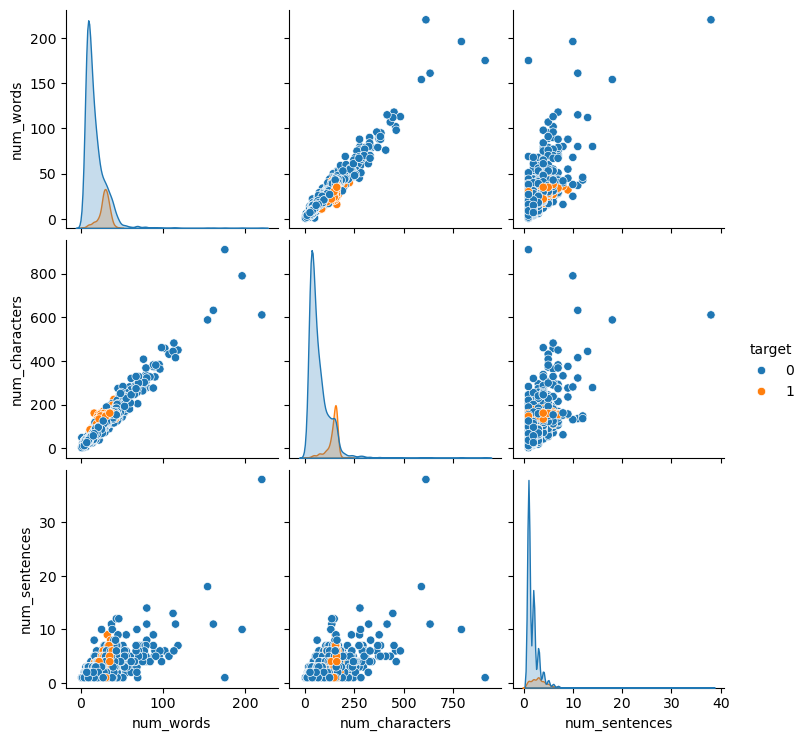

In [101]:
sns.pairplot(df,hue="target")

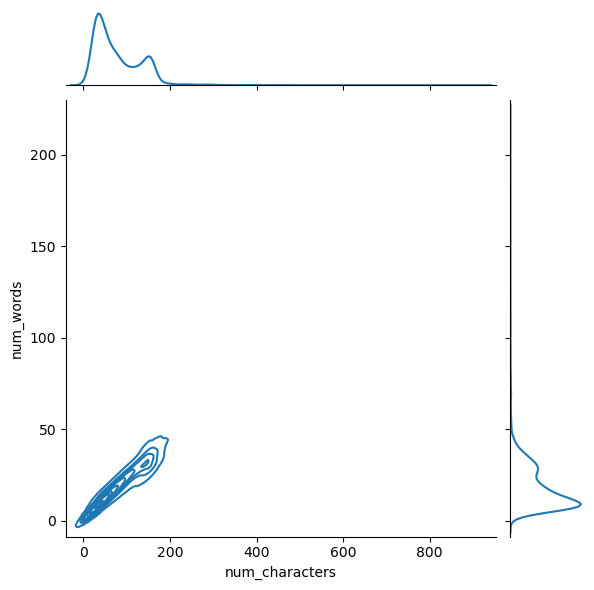

In [99]:
sns.jointplot(x="num_characters", y="num_words", data=df, kind="kde")

<Axes: >

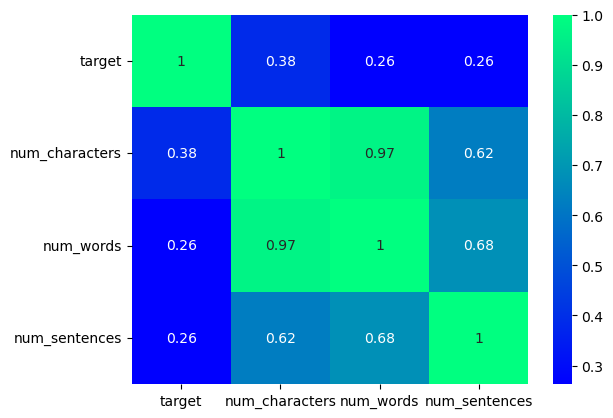

In [100]:
sns.heatmap(temp1.corr(),annot=True,cmap="winter",cbar=True)

In [156]:
df


,target,text,num_words,num_characters,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",24,111,2
1,0,Ok lar... Joking wif u oni...,8,29,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,155,2
3,0,U dun say so early hor... U c already then say...,13,49,1
4,0,"Nah I don't think he goes to usf, he lives aro...",15,61,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,35,161,4
5568,0,Will Ì_ b going to esplanade fr home?,9,37,1
5569,0,"Pity, * was in mood for that. So...any other s...",15,57,2
5570,0,The guy did some bitching but I acted like i'd...,27,125,1


In [169]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [159]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [163]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\DHRUV
[nltk_data]     PATEL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [165]:
from nltk.corpus import stopwords

In [167]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [171]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [173]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [175]:
df['transformed_text'] = df['text'].apply(transform_text)

In [177]:
df

,target,text,num_words,num_characters,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",24,111,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,8,29,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,155,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,13,49,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",15,61,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,35,161,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,9,37,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",15,57,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,27,125,1,guy bitch act like interest buy someth els nex...


In [179]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [181]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

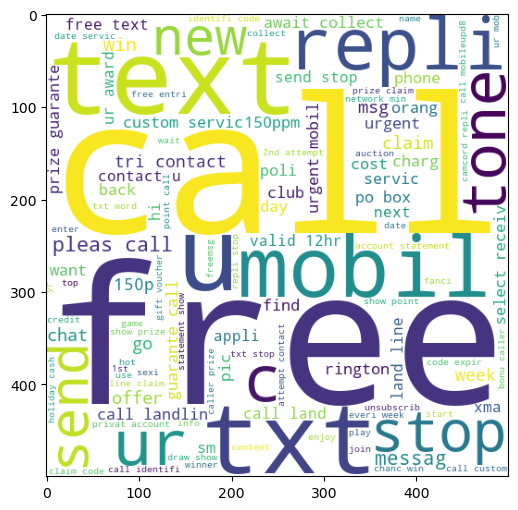

In [183]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [185]:

ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

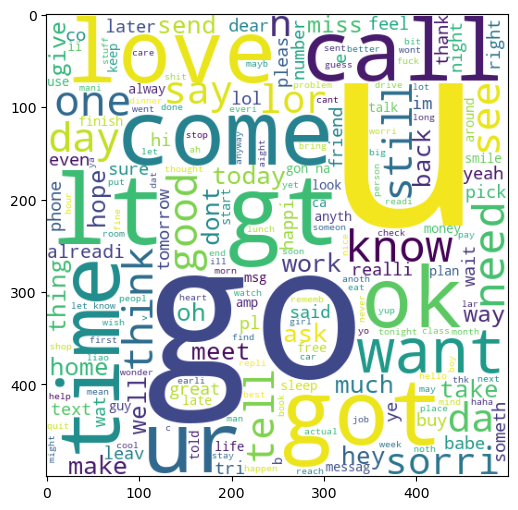

In [187]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [189]:
df

,target,text,num_words,num_characters,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",24,111,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,8,29,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,155,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,13,49,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",15,61,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,35,161,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,9,37,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",15,57,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,27,125,1,guy bitch act like interest buy someth els nex...


In [191]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [193]:
len(spam_corpus)

9939

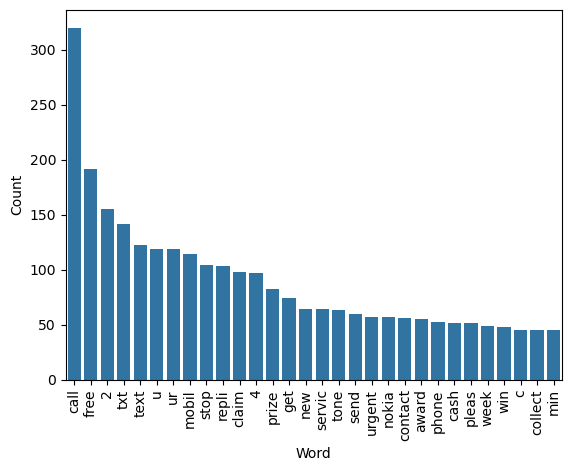

In [197]:
import seaborn as sns
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt


word_counts = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=["Word", "Count"])
sns.barplot(x=word_counts["Word"], y=word_counts["Count"])
plt.xticks(rotation='vertical')
plt.show()


In [199]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

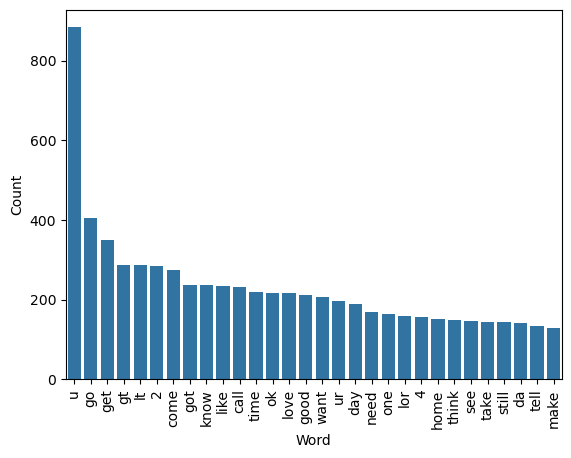

In [201]:
import seaborn as sns
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Create a DataFrame from the most common words in ham_corpus
word_counts = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=["Word", "Count"])

# Plot the barplot with x as "Word" and y as "Count"
sns.barplot(x=word_counts["Word"], y=word_counts["Count"])

# Rotate x-axis labels for readability
plt.xticks(rotation='vertical')

# Show the plot
plt.show()


In [203]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [205]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [207]:
y = df['target'].values

In [209]:
from sklearn.model_selection import train_test_split

In [211]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [213]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [215]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [217]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [219]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [221]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [223]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))